# Pose Estimation With YoloV8

In [2]:
#Librerias 
from ultralytics import YOLO 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pydantic import BaseModel
import os
import glob
import csv
import torch

In [4]:
#Load Model 
model = YOLO('yolov8n-pose.pt')

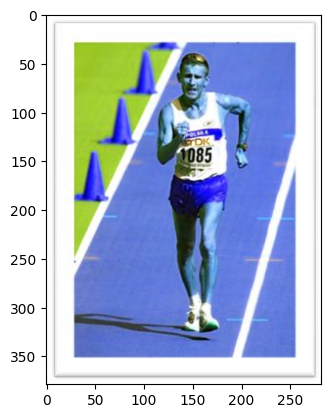

In [8]:
#Test Image
img = cv2.imread('marcha.jpg') 
#Show the image with matplotlib
plt.imshow(img)
plt.show()

In [14]:
def data_move(img):
    # predict on an image
    results = model.predict(img, save=False)[0]
    #Key Point XYZ
    data = results.keypoints.data[0]
    data = data[4:]

    #Show Shape of key point in xyz
    results.keypoints[0].data[0].shape
    return data

In [18]:
def detect_frame(video_path):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)
    
    # Check if video is opened successfully
    if not video_capture.isOpened():
        print("Error: Could not open video.")
        return
    
    # Read the first frame
    success, frame = video_capture.read()
    frame_number = 0
    
    # Loop through the video frames
    while success:

        data=data_move(frame)
        print(data)
        # Read the next frame
        success, frame = video_capture.read()
        frame_number += 1
    
    # Release the video capture object
    video_capture.release()


In [19]:
if __name__ == "__main__":
    # Path to the input video file
    video_path = "caminando.mp4"   
    
    # Call the function to save frames
    detect_frame(video_path)


0: 640x384 1 person, 172.0ms
Speed: 5.5ms preprocess, 172.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
tensor([[0.0000e+00, 0.0000e+00, 8.6713e-02],
        [6.1708e+02, 4.1625e+02, 9.9786e-01],
        [5.8589e+02, 4.0864e+02, 8.3944e-01],
        [6.2094e+02, 5.2067e+02, 9.9414e-01],
        [0.0000e+00, 0.0000e+00, 2.9199e-01],
        [5.8919e+02, 6.0856e+02, 9.7703e-01],
        [0.0000e+00, 0.0000e+00, 3.3860e-01],
        [6.0175e+02, 6.0494e+02, 9.9744e-01],
        [5.8409e+02, 5.9840e+02, 9.7698e-01],
        [5.9885e+02, 7.4088e+02, 9.9572e-01],
        [5.9296e+02, 7.2824e+02, 9.6637e-01],
        [6.0818e+02, 8.7967e+02, 9.7812e-01],
        [6.0763e+02, 8.5737e+02, 9.2516e-01]])

0: 640x384 1 person, 200.3ms
Speed: 3.7ms preprocess, 200.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
tensor([[0.0000e+00, 0.0000e+00, 8.4197e-02],
        [6.1704e+02, 4.1630e+02, 9.9778e-01],
        [5.8697e+02, 4.0848e+02, 8.3000e-01],
       

In [11]:
#Show Shape of key point in xyz
results.keypoints[0].data[0].shape
tensors = torch.tensor(torch.empty(17,3))
tensors = [tensors] + [data]

#Concat Tensors
new_tensors = torch.stack([tensors])

tensors = [tensors] + [data]

#Concat Tensors
new_tensors = torch.stack([tensors])
new_tensors.shape


torch.Size([2, 17, 3])